In [3]:
import pandas as pd
import glob

In [4]:
path = './test_data/*'
all_path = glob.glob(path)
all_data = []
for num in range(len(all_path)):
    df = pd.read_csv(all_path[num])
    all_data.append(df)



In [5]:
concat_df = pd.concat(all_data, axis=1)

In [6]:
concat_df['Unnamed: 0'].iloc[:, :1]

,Unnamed: 0
0,randomforest
1,adaboost
2,gradientboost
3,KNeighbors
4,catboost
5,xgboost
6,GaussianNB


In [7]:
preprocessed_df = concat_df[['accuracy', 'f1_weighted', 'precision', 'recall', 'Unnamed: 0']].iloc[:, :5]
preprocessed_df.index
# preprocessed_df.index = preprocessed_df['accuracy', 'f1_weighted', 'precision', 'recall', 'score']
# preprocessed_df

RangeIndex(start=0, stop=7, step=1)

In [8]:
preprocessed_df.columns = [['accuracy', 'f1_weighted', 'precision', 'recall', 'model_names']]

In [9]:
preprocessed_df

,accuracy,f1_weighted,precision,recall,model_names
0,0.590312,0.576683,0.518782,0.410645,randomforest
1,0.561621,0.403962,0.199394,0.010256,adaboost
2,0.583558,0.573959,0.534439,0.462093,gradientboost
3,0.543603,0.524743,0.460266,0.372258,KNeighbors
4,0.581852,0.578936,0.554952,0.435170,catboost
5,0.603236,0.589257,0.544441,0.468437,xgboost
6,0.501402,0.478946,0.393941,0.275931,GaussianNB


In [10]:
preprocessed_df.transpose()

,0,1,2,3,4,5,6
accuracy,0.590312,0.561621,0.583558,0.543603,0.581852,0.603236,0.501402
f1_weighted,0.576683,0.403962,0.573959,0.524743,0.578936,0.589257,0.478946
precision,0.518782,0.199394,0.534439,0.460266,0.554952,0.544441,0.393941
recall,0.410645,0.010256,0.462093,0.372258,0.43517,0.468437,0.275931
model_names,randomforest,adaboost,gradientboost,KNeighbors,catboost,xgboost,GaussianNB


In [11]:
preprocessed_df.index = preprocessed_df['model_names']

In [12]:
test_df = preprocessed_df.iloc[:, :4]

In [13]:
preprocessed_df.iloc[:, :4]

,accuracy,f1_weighted,precision,recall
"(randomforest,)",0.590312,0.576683,0.518782,0.410645
"(adaboost,)",0.561621,0.403962,0.199394,0.010256
"(gradientboost,)",0.583558,0.573959,0.534439,0.462093
"(KNeighbors,)",0.543603,0.524743,0.460266,0.372258
"(catboost,)",0.581852,0.578936,0.554952,0.435170
"(xgboost,)",0.603236,0.589257,0.544441,0.468437
"(GaussianNB,)",0.501402,0.478946,0.393941,0.275931


In [14]:
test_df.index = concat_df['Unnamed: 0'].iloc[:, :1]

In [15]:
test_df.to_csv('./test.csv', index=False)

In [16]:
preprocessed_df.iloc[:, :4].transpose()

,"(randomforest,)","(adaboost,)","(gradientboost,)","(KNeighbors,)","(catboost,)","(xgboost,)","(GaussianNB,)"
accuracy,0.590312,0.561621,0.583558,0.543603,0.581852,0.603236,0.501402
f1_weighted,0.576683,0.403962,0.573959,0.524743,0.578936,0.589257,0.478946
precision,0.518782,0.199394,0.534439,0.460266,0.554952,0.544441,0.393941
recall,0.410645,0.010256,0.462093,0.372258,0.435170,0.468437,0.275931


<Axes: >

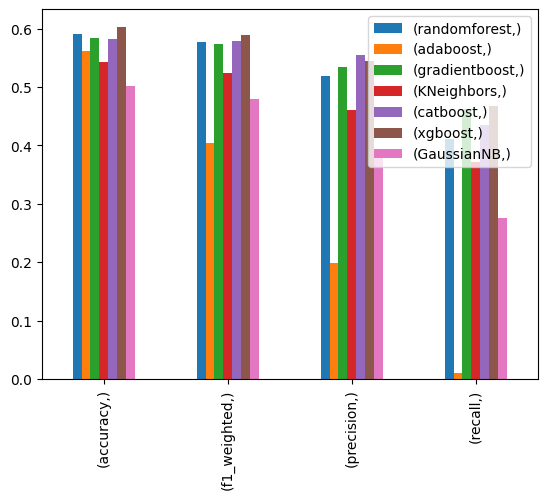

In [17]:
preprocessed_df.iloc[:, :4].transpose().plot.bar()